## Q3 - Predict Bus or Truck

**Classification Process Summarized**

1. We **begin with a data set** containing multiple samples, elements, records, or instances (all are the same terms used by different disciplines). 

2. Each instance is a **feature vector** consists of a number of features or attributes.  

3. One of the features is special: it represents the instance's class - the **class label**. Each instance **belongs to exactly one class**.

4. Classification problems are either **binary** or **multiclass**.

5. A number of classification algorithms are limited to only binary classification. However, multiclass problems can be **decomposed into series of binary classification problems** ie. an instance belongs to the target class or to any other class.

6. A classifier takes as input an instance (i.e., a feature vector) and **produces a class label**.

7. Creating and using a classifier entails a three-step process of: **training, testing, and deployment** in an application.

8. We first split the existing data set into a **training set** and a **test set**. 

9. In the training phase, we present each instance from the training set to the classification algorithm. 

10. Then compare the class label produced by the algorithm to the true class label of the record in question.

11. If possible, then we adjust the algorithm's **“parameters”** to achieve the greatest possible **accuracy** or, equivalently, the lowest possible **error rate**. 

12. The results can be **summarized** in a so-called **confusion matrix** whose entries are the number of records in each category.

13. Unfortunately, the **error rate derived from the training set** (the training error) is typically **too optimistic** as an indicator of the error rate the classifier would achieve on new data — that is, on data that was not used during the learning phase. 

13. This is the purpose of the test set: after we have optimized the algorithm using only the training data, we let the classifier operate on the elements of the test set to see how well it classifies them. The error rate obtained in this way is the **generalization error** and is a much more reliable indicator of the accuracy of the classifier.

14. Keep in mind the **trade-off** between **classifier complexity** and **overfitting**. The classifier can usually be tweaked to become more complex and  correctly learn all the training samples. But this is called overfitting and memorizing the data. On the other hand, if it is too simple, then it cannot learn the relationships within the data and both its training and generalization error will be poor; this is known as underfitting.

15. Once a classifier has been developed and tested, it can be used to **classify truly new and unknown data points** — that is, data points for which the correct class label is not known. (This is in contrast to the test set, where the class labels were known but not used by the classifier when making a prediction.) 

Hi all, 

(excuse my grammar) 

This is roughly how you supposed to do your data cleaning:

1.Fix all the abbreviations and non English words to their actual English words in your twitter-labelled.csv 

2.Run the bag of words and re-split the file like you did in checkpoint 1

3.Do the attribute selection (play around with the criteria that you used to measure the usefulness of an attribute) as mentioned in my previous email.  Remember that an attribute selection criteria suitable for j48 may not be suitable (producing good result)  for other classifiers. 

4.Use cross validation or the validation set on the 4 classifiers that you have chosen to see whether or not you need to clean some more of your data

5.If you need to clean it some more,  use clustering method. First, make sure that the cluster produce groups that if you total all of its class distribution is sort of similar (closest) to the one that you want. Next, see what attributes are used to strongly define each cluster. Try to remove attribute that does not define a cluster (I. E they almost belong to two or more clusters with different label) 

6.Repeat 3-5 until you are happy with the cleaning 

7.Modify the parameters on each classifier to improve the performance 

8.Lastly Test it on the test set.  Remember don't use the test set at all during data cleaning or parameter tuning 

Aim to get 60-80% performance on validation or cross validation set.  You don't have to do both. Just cross validation is ok smile 

 Sorry I am not going to be in front of my computer this weekend so can't help you run your arff. However, you can email me if you have any questions. 

Regards, 

Veronica 

**Exercise:** Load the student grade dataset and use the Naive Bayes classifier to predict the class grade based on all the assignment results.

First train all the data and test the accuracy.

Then use different number of folds to test the accuracy of the generalization of your classifiers.

Lastly, experiment with using different combinations of assignment features and observe if the accuracy increases/decreases as you omit some of them.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)
from pylab import rcParams

sns.set(style="ticks")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [2]:
#from ftplib import FTP, error_perm
import os
import glob
#import pandas as pd
#import numpy as np
#import patoolib
import seaborn as sns
import simplekml

In [3]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [4]:
df_machine_data = pd.read_csv("Concatenated_machine_data.csv", index_col="id")
#df=pandas.read_csv(filename,sep=";",index_col="id",header=0)

In [5]:
df_machine_data.head()

,event_timestamp,course_over_ground,machine_id,vehicle_weight_type,speed_gps_kph,latitude,longitude
id,,,,,,,
1.4642e+10,2015-11-15 17:46:40,177,10051,HEAVY,3,-36.7256,174.7148
1.4643e+10,2015-11-15 18:12:41,156,10051,HEAVY,13,-36.7695,174.7416
1.4642e+10,2015-11-15 17:44:30,169,10051,HEAVY,0,-36.7231,174.7144
1.4642e+10,2015-11-15 18:00:47,150,10051,HEAVY,17,-36.7474,174.7234
1.4642e+10,2015-11-15 17:49:43,249,10051,HEAVY,6,-36.7283,174.7151


In [6]:
df= df_machine_data.dropna()

In [ ]:
# Set up our figure by naming it fig, call PairPLot on the DataFrame
#fig = sns.PairGrid(df[[2,5]])

# Using map_upper we can specify what the upper triangle will look like.
#fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
#fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
#fig.map_diag(plt.hist,bins=30)

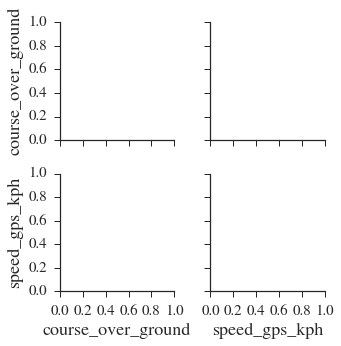

In [9]:
fig = sns.PairGrid(df[[1,4]])

In [27]:
#df.Class.unique()
#df.dtypes
df.vehicle_weight_type.unique()

array(['HEAVY', 'LIGHT'], dtype=object)

In [10]:
df.dtypes

event_timestamp        object
course_over_ground      int64
machine_id              int64
                       ...   
speed_gps_kph           int64
latitude              float64
longitude             float64
dtype: object

In [48]:
#df['Class'].replace('3', 0, inplace=True)

In classification problems, the **ability to separate classes** from one another is the most important consideration. Histograms of the feature values per class type, can be a useful tool for **eyeballing** some features and to get a rough feeling for their **discriminative power**. 

Here we are visualising the histograms of the two features for each of the two vehicle weight type:

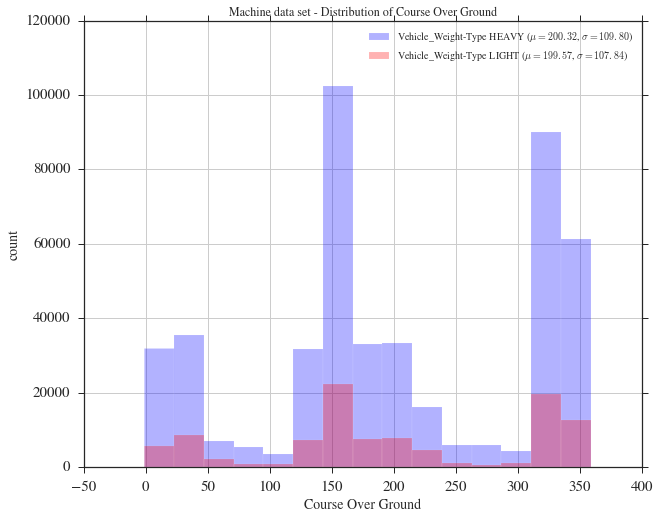

In [56]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red')

for label,color in zip(['HEAVY', 'LIGHT'], colors):
    mean = np.mean(df['course_over_ground'][df['vehicle_weight_type'] == label]) # class sample mean
    stdev = np.std(df['course_over_ground'][df['vehicle_weight_type'] == label]) # class standard deviation
    df['course_over_ground'][df['vehicle_weight_type'] == label].hist(alpha=0.3, # opacity level
             label='Vehicle_Weight-Type {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Course Over Ground')
plt.xlabel('Course Over Ground', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

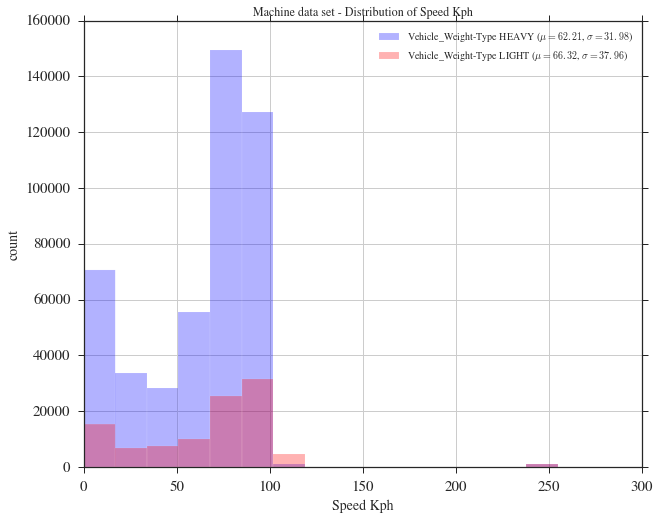

In [58]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red')

for label,color in zip(['HEAVY', 'LIGHT'], colors):
    mean = np.mean(df['speed_gps_kph'][df['vehicle_weight_type'] == label]) # class sample mean
    stdev = np.std(df['speed_gps_kph'][df['vehicle_weight_type'] == label]) # class standard deviation
    df['speed_gps_kph'][df['vehicle_weight_type'] == label].hist(alpha=0.3, # opacity level
             label='Vehicle_Weight-Type {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Machine data set - Distribution of Speed Kph')
plt.xlabel('Speed Kph', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

### Classifier - Naive Bayes

We can train a Naive Bayes classifier on all our training data as follows and use the model for prediction:

In [29]:
classifier = nb.fit(df[['course_over_ground','speed_gps_kph']], df['vehicle_weight_type'])
classifier

GaussianNB()

We can find out how well our classifier learned the training dataset based on overall accuracy:

In [30]:
classifier.score(df[['course_over_ground','speed_gps_kph']], df['vehicle_weight_type'])

0.8198157232196468

If we want to split the dataset into a training and test set with the test set comprising 20% is the dataset, we do as follows:

In [31]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['course_over_ground','speed_gps_kph']], df['vehicle_weight_type'], random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(455662, 2)
(113916, 2)
(455662L,)
(113916L,)


We can now train the classifier on the training dataset and test it on the unseen dataset:

In [39]:
classifier = nb.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['HEAVY', 'HEAVY', 'HEAVY', ..., 'HEAVY', 'HEAVY', 'HEAVY'], 
      dtype='|S5')

In [40]:
classifier.score(X_test, y_test)

0.81962147547315567

We can generate a more comprehensive accuracy report:

In [42]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

      HEAVY       0.82      1.00      0.90     93409
      LIGHT       0.46      0.01      0.02     20507

avg / total       0.76      0.82      0.74    113916



Let's see what the confusion matrix looks like:

In [43]:
print metrics.confusion_matrix(y_test, y_pred)

[[93155   254]
 [20294   213]]


If we would prefer to use stratified cross-fold validations, then:

In [44]:
from sklearn.cross_validation import cross_val_score
classifierNB = GaussianNB()
scores = cross_val_score(classifierNB, X_test, y_test, cv=5, scoring='accuracy')
scores

array([ 0.81947858,  0.8193908 ,  0.81916341,  0.82004126,  0.82003336])

The code above uses 5 folds and uses accuracy for a general evaluation metric. The returned result is accuracy for each of the folds.

We can find the mean and standard deviation of all the results:

In [45]:
print 'mean is: ', scores.mean()
print 'STD is: ', scores.std()

mean is:  0.819621482368
STD is:  0.000354772898315


If we want to split the dataset into a training and test set with the test set comprising 20% is the dataset, we do as follows: